In [1]:
import sys
import pandas as pd
from pathlib import Path

from utils import read_or_new_pickle

In [26]:
path = Path('data')

In [27]:
cases = read_or_new_pickle(path / 'cases.pkl')

cases = pd.DataFrame(cases)

print(f"cases weight {round(sys.getsizeof(cases) / (1024 ** 3), 3)}Gb")
print(cases.shape[0])

New file has been created.
cases weight 0.0Gb
0


In [13]:
# cases['easylaw Case No.'].nunique() == cases.drop_duplicates(set(cases.columns) - set(['search_term'])).shape[0]

# # -> unique cases by 'easylaw Case No.' are equal to unique cases by all parameters except 'seatch_term'

In [14]:
cases = cases.drop_duplicates('easylaw Case No.').reset_index(drop=True)

cases['Date'] = pd.to_datetime(cases['Date'])

print(cases.shape[0])

12743


In [16]:
cases.to_csv(path / 'cases_new_3.csv', sep='\t', index=False, header=True, encoding='utf-8')

# Concatinating

In [30]:
cases = pd.read_csv(path / 'cases_base.csv', sep='\t', encoding='utf-8')

In [22]:
cases_new_batch = pd.read_csv(path / 'cases.csv', sep='\t', encoding='utf-8')

In [23]:
cases = pd.concat([cases, cases_new_batch], axis=0)

print(f"cases weight {round(sys.getsizeof(cases) / (1024 ** 3), 3)}Gb")
print(cases.shape[0])

cases weight 2.599Gb
71208


cases weight 2.018Gb
61745


<Axes: xlabel='Date'>

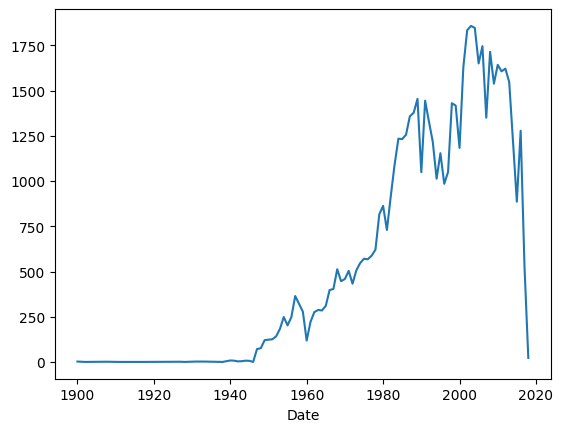

In [31]:
cases = cases.drop_duplicates('easylaw Case No.').reset_index(drop=True)

cases['Date'] = pd.to_datetime(cases['Date'])

print(f"cases weight {round(sys.getsizeof(cases) / (1024 ** 3), 3)}Gb")
print(cases.shape[0])

cases['Date'].dt.year.value_counts().sort_index().plot()

In [25]:
cases.to_csv(path / 'cases_base.csv', sep='\t', index=False, header=True, encoding='utf-8')